In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [2]:
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/all/nc/20140323_SUPERsnow_depth_3mCl.nc'

In [3]:
ds = xr.open_dataset(path)


f=path
dt_str = f.split("/")[-1] #splits on / and saves the last one
dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
dt = pd.to_datetime(dt_str[:8]) #convert to datetime, grabs digits for dates only
print(dt.date())
time_var = pd.to_datetime(dt.date())
ds['DATE'] = (time_var)
ds = ds.assign_coords(time=ds.DATE)
ds


2014-03-23


<xarray.Dataset>
Dimensions:              (x: 17568, y: 16781)
Coordinates:
  * x                    (x) float64 2.54e+05 2.54e+05 ... 3.067e+05 3.067e+05
  * y                    (y) float64 4.179e+06 4.179e+06 ... 4.23e+06 4.23e+06
    time                 datetime64[ns] 2014-03-23
Data variables:
    transverse_mercator  |S1 ...
    Band1                (y, x) float64 ...
    DATE                 datetime64[ns] 2014-03-23
Attributes:
    GDAL_AREA_OR_POINT:     Area
    GDAL_TIFFTAG_SOFTWARE:  MATLAB 8.5, Mapping Toolbox 4.1
    Conventions:            CF-1.5
    GDAL:                   GDAL 2.2.3, released 2017/11/20
    history:                Thu Aug 01 17:15:53 2019: GDAL CreateCopy( /home/...

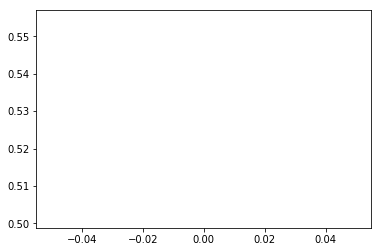

In [7]:
d = ds.Band1.mean
# d = ds.mean(var="Band1")
d
plt.plot(d())
plt.show()




# varsn = ds.Band1.var(dim='time') #compute variance on every pixel in the time dimention 
# varsn = np.where(varsn>.001, varsn, np.nan) # filters everything greater than 1mm (i.e gives alpha bg)
# fig = plt.figure(figsize=(15, 10))
# plt.imshow(varsn[::-1,:], cmap='jet', vmin=.05, vmax=1.0) #[::-1,:] - reverses it
# plt.title('snow depth [50m] variance, 2013-2016')
# plt.colorbar()
# plt.savefig('figs/var_13-16', dpi=600)